# Python for Machine Learning

### *Session \#3*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Logistic Regression

### Warm Ups

*Type the given code into the cell below*

---

In [99]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.target import ClassBalance

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_excel('titanic.xlsx').dropna()

**Split into data sets**: 
```python
X = df[['age']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

In [3]:
X = df[['age']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Create and fit classifier**: 
```python
model = LogisticRegression()
model.fit(X_train, y_train)
```

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Use model to classify**: `model.predict(X_test)`

In [5]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

**Use model to get probabilities**: `model.predict_proba(X_test)`

In [6]:
model.predict_proba(X_test)

array([[0.32187795, 0.67812205],
       [0.33609442, 0.66390558],
       [0.27476498, 0.72523502],
       [0.37291535, 0.62708465],
       [0.32540255, 0.67459745],
       [0.32540255, 0.67459745],
       [0.36169027, 0.63830973],
       [0.25901613, 0.74098387],
       [0.37291535, 0.62708465],
       [0.41127129, 0.58872871],
       [0.2944291 , 0.7055709 ],
       [0.33251109, 0.66748891],
       [0.41909031, 0.58090969],
       [0.38427907, 0.61572093],
       [0.26211847, 0.73788153],
       [0.26211847, 0.73788153],
       [0.39577053, 0.60422947],
       [0.35428903, 0.64571097],
       [0.26524465, 0.73475535],
       [0.32187795, 0.67812205],
       [0.29109522, 0.70890478],
       [0.25901613, 0.74098387],
       [0.41517546, 0.58482454],
       [0.30798385, 0.69201615],
       [0.30798385, 0.69201615],
       [0.36915773, 0.63084227],
       [0.41517546, 0.58482454],
       [0.25593779, 0.74406221],
       [0.40349683, 0.59650317],
       [0.35798119, 0.64201881],
       [0.

### Exercises
---

**1. Copy/paste the slope from** `model.coef_` **and the intercept from** `model.intercept_`

In [9]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]

**2. Plot the underlying linear model using plt.plot().**

**First feed in** `X_test` **as the x-axis and** `X_test*slope + intercept` **as the y-axis**

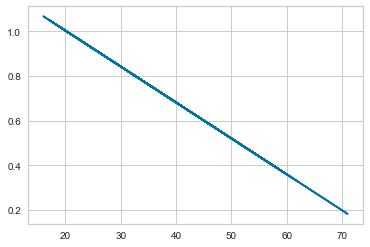

In [11]:
plt.plot(X_test, X_test*slope + intercept)

**3. Use** `plt.scatter` **to plot** `X_test` **and** `y_test`, **and also to plot** `curve_x` and `curve_y` **which show the curve of the logistic classifier**

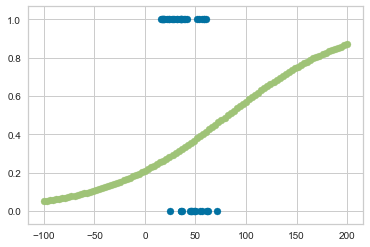

In [14]:
curve_x = np.linspace(-100, 200, 100).reshape(-1, 1)
curve_y = [a for a,b in model.predict_proba(curve_x)]

plt.scatter(X_test, y_test)
plt.scatter(curve_x, curve_y)

**4. What is your own probability of survival? Because the model expects a dataframe, you'll need to wrap your age in lists. So if your age is 50, you'll input** `[[50]]`

In [16]:
model.predict_proba([[30]])

array([[0.30116308, 0.69883692]])

**5. Use one-hot encoding to add all the columns to your model. Call** `model.score(X_test, y_test)` **to see the accuracy of your model.**

Hint: Use `make_column_transformer` to separate categorical and numeric data

In [91]:
X = df.drop(['alive', 'survived'], 1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y)

numeric = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']
categorical = ['sex', 'embark_town', 'class', 'who','deck']

model = LogisticRegression()

trans = make_column_transformer(
            (StandardScaler(), numeric),
            (OneHotEncoder(), categorical)
        )

pipeline = make_pipeline(trans, model)
pipeline.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare',
                                                   'adult_male', 'alone']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                ca...
 

## II. Evaluating Classifiers

### Warm Ups

*Type the given code into the cell below*

---

**Test accuracy of your model:** `pipeline.score(X_test, y_test)`

In [63]:
pipeline.score(X_test,y_test)

0.717391304347826

**Create confusion matrix:** 
```python
pipeline = ConfusionMatrix(pipeline)
pipeline.score(X_test, y_test)
```

**Plot class prediction error:**
```
pipeline = ClassPredictionError(pipeline)
pipeline.score(X_test, y_test)
```                    

**Plot ROC curve:** 
```python
pipeline = ROCAUC(pipeline)
pipeline.score(X_test, y_test)
```

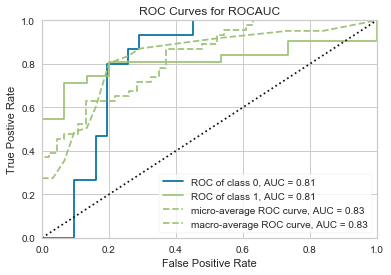

In [82]:
pipeline = ROCAUC(pipeline)
pipeline.score(X_test, y_test)
pipeline.finalize()

### Exercises
---

**1. Plot the confusion matrix. What is more common -- false positives or false negatives?**

0.8306127876055034

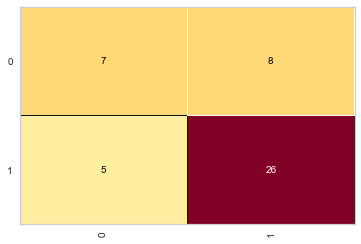

In [83]:
pipeline = ConfusionMatrix(pipeline)
pipeline.score(X_test, y_test)

**2. Plot the class prediction error. Which class has a higher rate of error?**

0.8306127876055034

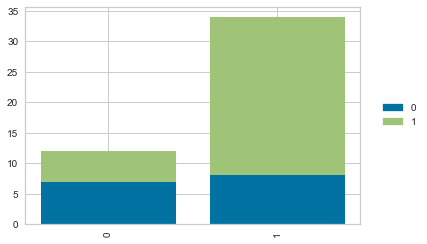

In [84]:
pipeline = ClassPredictionError(pipeline)
pipeline.score(X_test, y_test)

**3. Create an ROC curve for the model. Is the model closer to an ideal model or random chance?**

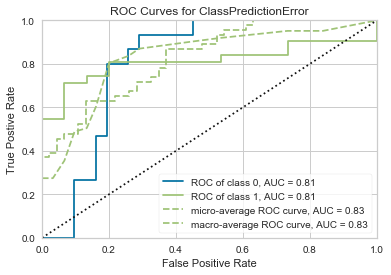

In [85]:
pipeline = ROCAUC(pipeline)
pipeline.score(X_test, y_test)
pipeline.finalize()

## III. Class Imbalance

### Warm Ups

*Type the given code into the cell below*

---

**Plot the class balance**: 
```python
viz = ClassBalance()
viz.fit(y)
```

**Plot precision-recall curve:**
```
pipeline = PrecisionRecallCurve(pipeline)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)
```                    

**Create a balanced model:** 
```python
pipeline = make_pipeline(trans, RandomOverSampler(), LogisticRegression())
```

### Exercises
---

**1. Make a ClassBalance visualization. Which class is overrepresented in this dataset?**

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e32a470>,
             colormap=None, colors=None, labels=None)

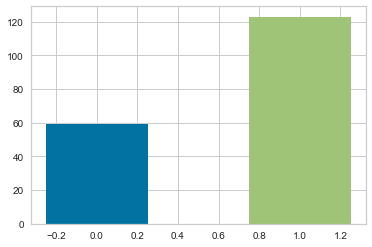

In [100]:
viz = ClassBalance()
viz.fit(y)

**2. Plot a precision-recall curve of this imbalanced dataset. How does this graph compare to the ROC curve?**

0.8633390098943113

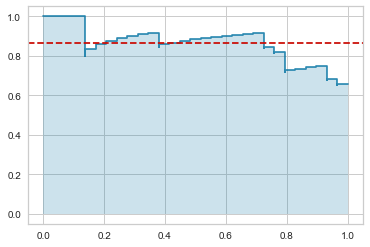

In [92]:
pipeline = PrecisionRecallCurve(pipeline)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

**3. Create a new model that uses RandomOverSampler() as part of the pipeline**

In [96]:
pipeline = make_pipeline(trans, RandomOverSampler(), LogisticRegression())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7608695652173914